In [1]:
import numpy as np 
import struct
from array import array
from os.path  import join
import tensorflow as tf
from six.moves import cPickle as pickle
from six.moves import range
import matplotlib.pyplot as plt
from PIL import Image
import random
#necessary imports


#execute operations immediately
tf.enable_eager_execution()


#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        
        #convert to numpy array
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test) 

D:\Users\userr\anaconda3\envs\py365\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Users\userr\anaconda3\envs\py365\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Users\userr\anaconda3\envs\py365\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Users\userr\anaconda3\envs\py365\lib\site-packages\tensorflow\python\f

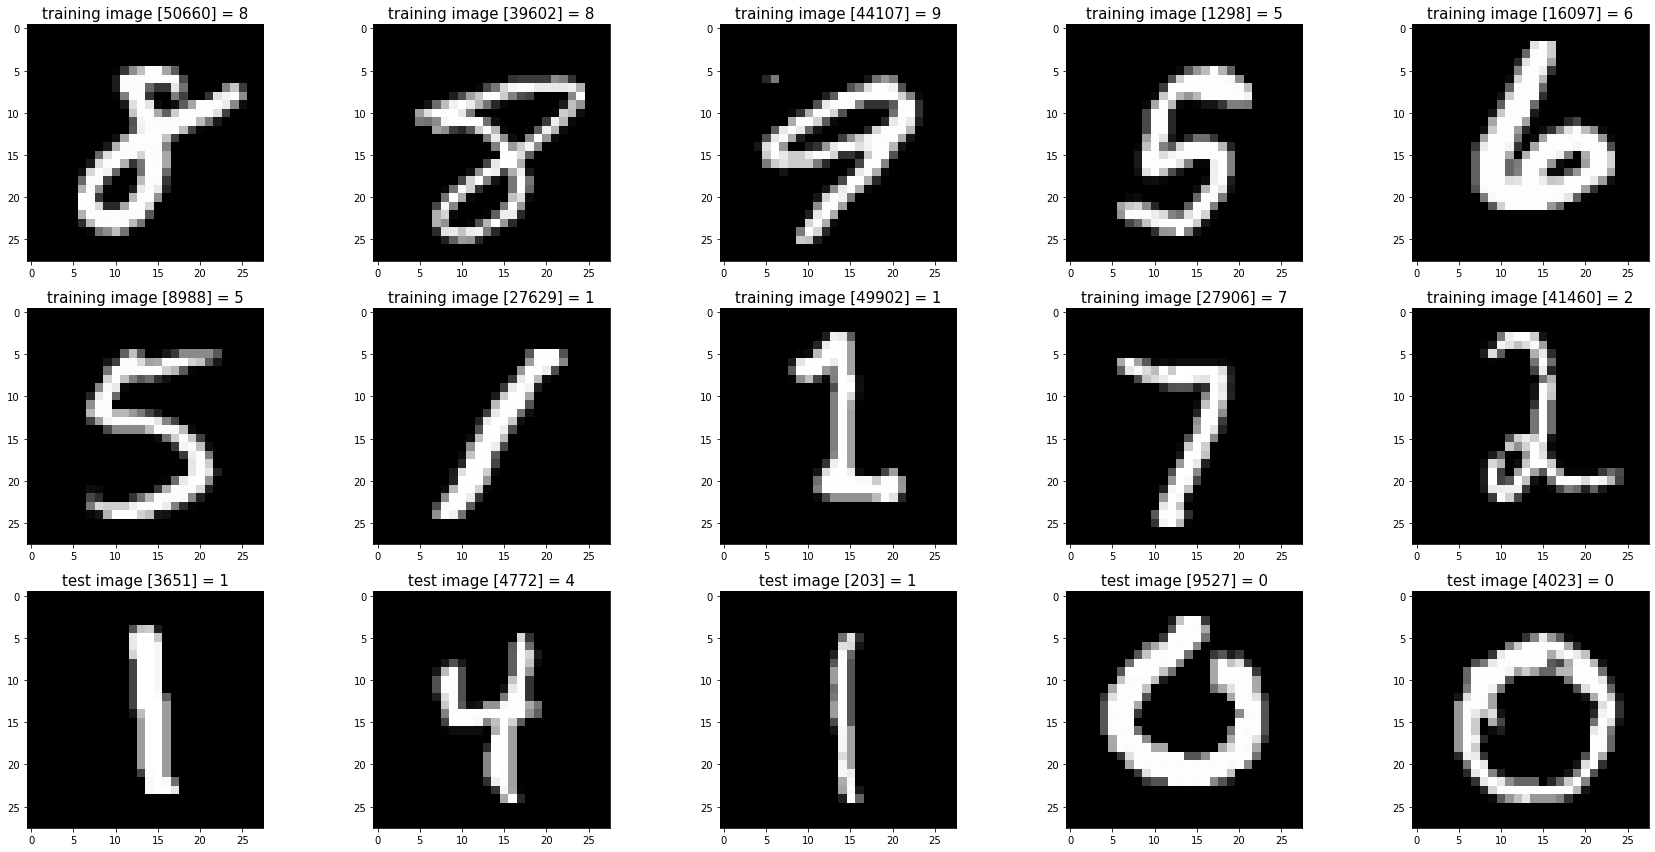

In [2]:
#
# Verify Reading Dataset via MnistDataloader class
#

#add graphs to ipynb notebook inline displaying
%matplotlib inline

#
# Set file paths based on added MNIST Datasets
#
input_path = 'D:/magistratura/magistratura/MO'
training_images_filepath = join(input_path, 'train-images.idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels.idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images.idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels.idx1-ubyte')

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

#
# Show some random training and test images 
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_2_show, titles_2_show)

In [3]:
#convert 28*28 information to 32*32 information by adding zero padding
x_pad = tf.pad(tensor=np.array(x_train, dtype='float32'), paddings=[[0, 0], [2,2], [2,2]])


#convert to numpy array
digitStruct = x_pad.numpy()


#dataset with images pixels information
dataset = np.ndarray(shape=(len(digitStruct), 32, 32), dtype='float32')

#dataset with images labels
labels = np.ones(shape=(len(digitStruct), 6), dtype='int') * 10


for i in range(len(digitStruct)):
    
    #convert labels to google street view labels format
    labels[i][0] = 1
    if y_train[i] == 0:
        labels[i][1] = 10
    else:
        labels[i][1] = y_train[i]
        
    pixel_depth=255.0
    
    #normalization
    region = (x_pad[i] - (pixel_depth / 2)) / (pixel_depth / 2)

    dataset[i, :, :] = region[:, :]

train_dataset = dataset
train_labels = labels

In [4]:
#convert 28*28 information to 32*32 information by adding zero padding
x_pad = tf.pad(tensor=np.array(x_test, dtype='float32'), paddings=[[0, 0], [2,2], [2,2]])

#convert to numpy array
digitStruct = x_pad.numpy()

#dataset with images pixels information
dataset = np.ndarray(shape=(len(digitStruct), 32, 32), dtype='float32')

#dataset with images labels
labels = np.ones(shape=(len(digitStruct), 6), dtype='int') * 10


for i in range(len(digitStruct)):
    
    #convert labels to google street view labels format
    labels[i][0] = 1
    if y_test[i] == 0:
        labels[i][1] = 10
    else:
        labels[i][1] = y_test[i]
        
    pixel_depth=255.0
    
    #normalization
    region = (x_pad[i] - (pixel_depth / 2)) / (pixel_depth / 2)

    dataset[i, :, :] = region[:, :]

test_dataset = dataset
test_labels = labels

In [5]:
#randomize images order
permutation = np.random.permutation(test_labels.shape[0])
shuffled_dataset = test_dataset[permutation, :, :]
shuffled_labels = test_labels[permutation]
test_dataset = shuffled_dataset
test_labels = shuffled_labels

In [6]:
#randomize images order
permutation = np.random.permutation(train_labels.shape[0])
shuffled_dataset = train_dataset[permutation, :, :]
shuffled_labels = train_labels[permutation]
train_dataset = shuffled_dataset
train_labels = shuffled_labels

In [8]:
extra_to_validation = 1000

#add 1000 images to validation dataset
valid_dataset = train_dataset[:extra_to_validation - 1]
valid_labels = train_labels[:extra_to_validation - 1]

print('train_dataset:', valid_dataset.shape)
print('train_labels:', valid_labels.shape)

train_dataset: (999, 32, 32)
train_labels: (999, 6)


In [9]:
#remove 1000 images from train dataset
train_dataset = train_dataset[extra_to_validation:]
train_labels = train_labels[extra_to_validation:]

print('valid_dataset:', train_dataset.shape)
print('valid_labels:', train_labels.shape)

valid_dataset: (59000, 32, 32)
valid_labels: (59000, 6)


D:\Users\userr\anaconda3\envs\py365\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


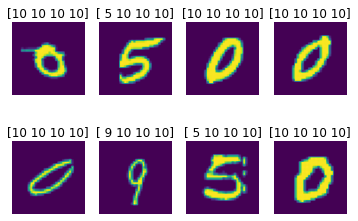

In [10]:
#example of train images
items = random.sample(range(train_dataset.shape[0]), 8)
for i, item in enumerate(items):
    plt.subplot(2, 4, i + 1)
    plt.axis('off')
    plt.title(train_labels[i][1:5])
    plt.imshow(train_dataset[i, :, :])
plt.show()

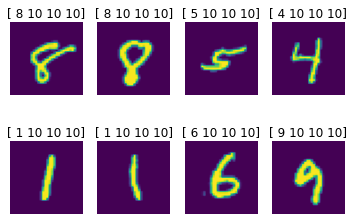

In [11]:
#example of test images
items = random.sample(range(test_dataset.shape[0]), 8)
for i, item in enumerate(items):
    plt.subplot(2, 4, i + 1)
    plt.axis('off')
    plt.title(test_labels[i][1:5])
    plt.imshow(test_dataset[i, :, :])
plt.show()

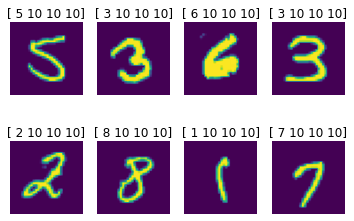

In [12]:
#example of validation images
items = random.sample(range(valid_dataset.shape[0]), 8)
for i, item in enumerate(items):
    plt.subplot(2, 4, i + 1)
    plt.axis('off')
    plt.title(valid_labels[i][1:5])
    plt.imshow(valid_dataset[i, :, :])
plt.show()

In [13]:
#save all information to pickle file
pickle_file = 'D:/magistratura/magistratura/MO/lab4/MNIST_multi_crop_normalized_32.pickle'
try:
    f = open(pickle_file, 'wb')
    save = {
        'train_dataset': train_dataset,
        'train_labels': train_labels,
        'valid_dataset': valid_dataset,
        'valid_labels': valid_labels,
        'test_dataset': test_dataset,
        'test_labels': test_labels,
    }
    pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
    f.close()
    print("Done")
except Exception as e:
    print('Unable to save data to', pickle_file, ':', e)
    raise

Done
